In [83]:
import pandas as pd
import numpy as np

def model_outputs(model,leads,communities,price,count):
    #c=communities
    c_list=[]
    l_list=[]
    rev_list=[]
         
    if model=="Price per Lead":
        
        if (len(c_list)==0):
            l_list.append(leads)
            c_list.append(communities)
            rev_list.append(communities*leads*price)

        
        for i in range(35):
            if (count>0) & (count<13): 
                leads=leads+(leads*0.05)
                communities=communities+(communities*0.06)
                count=count+1
                l_list.append(leads)
                c_list.append(communities)
                rev_list.append(leads*communities*price)
                
            elif (count>=13) & (count<=24):    
                leads=leads+(leads*0.04)
                communities=communities+(communities*0.04)
                count=count+1
                l_list.append(leads)
                c_list.append(communities)
                rev_list.append(leads*communities*price)
            else:
                leads=leads+(leads*0.01)
                communities=communities+(communities*0.02)
                count=count+1
                l_list.append(leads)
                c_list.append(communities)
                rev_list.append(leads*communities*price)             
        
        data=pd.DataFrame({'timeframe':pd.date_range(start='1/1/2016', periods=36, freq='M').format(formatter=lambda x: x.strftime('%Y%m')),'leads': l_list,'m1_communities':c_list,'m1_revenue':rev_list})
        
    if model=="Price per Community":
        
        if (len(c_list)==0):
            c_list.append(communities)
            rev_list.append(communities*price)
            
        for i in range(35):
            if (count>0) & (count<13): 
                communities=communities+(communities*0.06*0.9)
                count=count+1
                c_list.append(communities)
                rev_list.append(communities*price)

            elif (count>=13) & (count<=24):    
                communities=communities+(communities*0.04*0.9)
                count=count+1
                c_list.append(communities)
                rev_list.append(communities*price)
            else:
                communities=communities+(communities*0.02*0.9)
                count=count+1
                c_list.append(communities)
                rev_list.append(communities*price) 
        data=pd.DataFrame({'timeframe':pd.date_range(start='1/1/2016', periods=36, freq='M').format(formatter=lambda x: x.strftime('%Y%m')),'m2_communities':c_list,'m2_revenue':rev_list})

    return data

In [84]:
m1=model_outputs("Price per Lead",4,6174,40,1)
m2=model_outputs("Price per Community",0,6174,400,1)

Model1: Data for Price per Lead model

In [45]:
print(m1)

        leads  m1_communities    m1_revenue timeframe
0    4.000000     6174.000000  9.878400e+05    201601
1    4.200000     6544.440000  1.099466e+06    201602
2    4.410000     6937.106400  1.223706e+06    201603
3    4.630500     7353.332784  1.361984e+06    201604
4    4.862025     7794.532751  1.515889e+06    201605
5    5.105126     8262.204716  1.687184e+06    201606
6    5.360383     8757.936999  1.877836e+06    201607
7    5.628402     9283.413219  2.090031e+06    201608
8    5.909822     9840.418012  2.326205e+06    201609
9    6.205313    10430.843093  2.589066e+06    201610
10   6.515579    11056.693678  2.881630e+06    201611
11   6.841357    11720.095299  3.207254e+06    201612
12   7.183425    12423.301017  3.569674e+06    201701
13   7.470762    12920.233058  3.860960e+06    201702
14   7.769593    13437.042380  4.176014e+06    201703
15   8.080377    13974.524075  4.516777e+06    201704
16   8.403592    14533.505038  4.885346e+06    201705
17   8.739735    15114.84524

Model2: Data for Price per Community Model

In [46]:
print(m2)

    m2_communities    m2_revenue timeframe
0      6174.000000  2.469600e+06    201601
1      6507.396000  2.602958e+06    201602
2      6858.795384  2.743518e+06    201603
3      7229.170335  2.891668e+06    201604
4      7619.545533  3.047818e+06    201605
5      8031.000992  3.212400e+06    201606
6      8464.675045  3.385870e+06    201607
7      8921.767498  3.568707e+06    201608
8      9403.542942  3.761417e+06    201609
9      9911.334261  3.964534e+06    201610
10    10446.546311  4.178619e+06    201611
11    11010.659812  4.404264e+06    201612
12    11605.235442  4.642094e+06    201701
13    12023.023918  4.809210e+06    201702
14    12455.852779  4.982341e+06    201703
15    12904.263479  5.161705e+06    201704
16    13368.816964  5.347527e+06    201705
17    13850.094375  5.540038e+06    201706
18    14348.697773  5.739479e+06    201707
19    14865.250892  5.946100e+06    201708
20    15400.399925  6.160160e+06    201709
21    15954.814322  6.381926e+06    201710
22    16529

In [85]:
dfinal = pd.merge(m1[['timeframe','leads','m1_communities','m1_revenue']],m2,on="timeframe", how='inner')
dfinal['revenue_diff']=dfinal['m1_revenue']-dfinal['m2_revenue']
dfinal['communities_cnt_diff']=dfinal['m1_communities']-dfinal['m2_communities']
dfinal

,timeframe,leads,m1_communities,m1_revenue,m2_communities,m2_revenue,revenue_diff,communities_cnt_diff
0,201601,4.000000,6174.000000,9.878400e+05,6174.000000,2.469600e+06,-1.481760e+06,0.000000
1,201602,4.200000,6544.440000,1.099466e+06,6507.396000,2.602958e+06,-1.503492e+06,37.044000
2,201603,4.410000,6937.106400,1.223706e+06,6858.795384,2.743518e+06,-1.519813e+06,78.311016
3,201604,4.630500,7353.332784,1.361984e+06,7229.170335,2.891668e+06,-1.529684e+06,124.162449
4,201605,4.862025,7794.532751,1.515889e+06,7619.545533,3.047818e+06,-1.531930e+06,174.987218
5,201606,5.105126,8262.204716,1.687184e+06,8031.000992,3.212400e+06,-1.525216e+06,231.203725
6,201607,5.360383,8757.936999,1.877836e+06,8464.675045,3.385870e+06,-1.508034e+06,293.261954
7,201608,5.628402,9283.413219,2.090031e+06,8921.767498,3.568707e+06,-1.478676e+06,361.645721
8,201609,5.909822,9840.418012,2.326205e+06,9403.542942,3.761417e+06,-1.435213e+06,436.875070
9,201610,6.205313,10430.843093,2.589066e+06,9911.334261,3.964534e+06,-1.375468e+06,519.508832


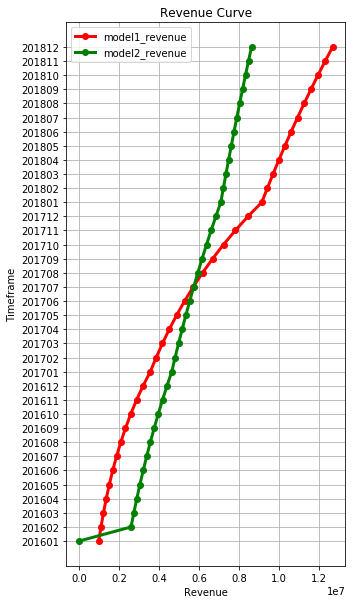

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.subplot(2, 1, 1)
plt.figure(figsize=(5, 10))
plt.title("Revenue Curve")
plt.xlabel("Revenue")
plt.ylabel("Timeframe")
plt.grid()
plt.plot( dfinal['m1_revenue'],dfinal['timeframe'], 'o-', color="r",label="model1_revenue",linewidth=3)
plt.plot( dfinal['m2_revenue'],dfinal['timeframe'], 'o-', color="g",label="model2_revenue",linewidth=3)
plt.legend(loc="best")

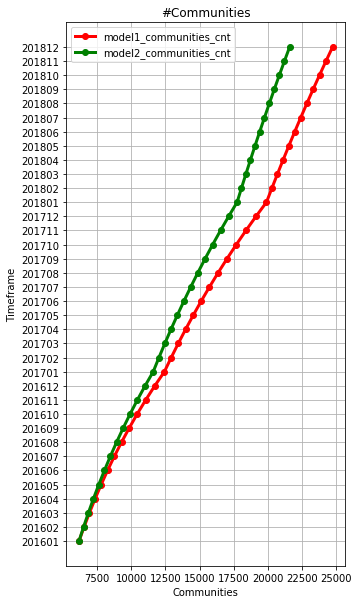

In [42]:
plt.figure(figsize=(5, 10))
plt.title("#Communities")
plt.xlabel("Communities")
plt.ylabel("Timeframe")
plt.grid()
plt.plot( dfinal['m1_communities'],dfinal['timeframe'], 'o-', color="r",label="model1_communities_cnt",linewidth=3)
plt.plot( dfinal['m2_communities'],dfinal['timeframe'], 'o-', color="g",label="model2_communities_cnt",linewidth=3)
plt.legend(loc="best")

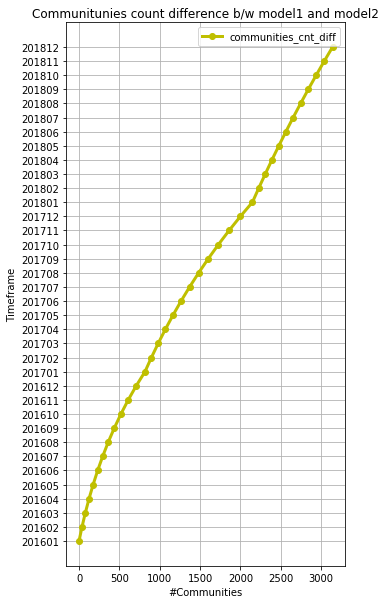

In [71]:
plt.figure(figsize=(5, 10))
plt.title("Communitunies count difference b/w model1 and model2")
plt.xlabel("#Communities")
plt.ylabel("Timeframe")
plt.grid()
plt.plot( dfinal['communities_cnt_diff'],dfinal['timeframe'], 'o-', color="y",label="communities_cnt_diff",linewidth=3)
plt.legend(loc="best")


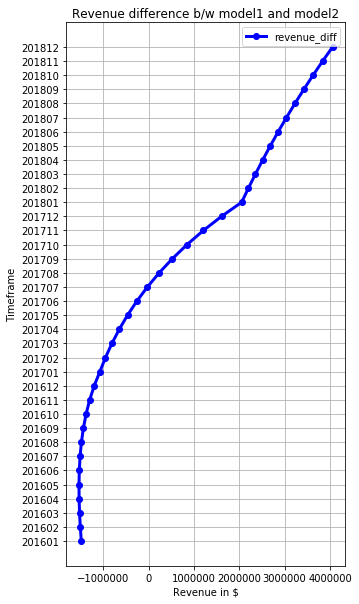

In [69]:
plt.figure(figsize=(5, 10))
plt.title("Revenue difference b/w model1 and model2")
plt.xlabel("Revenue in $")
plt.ylabel("Timeframe")
plt.grid()
plt.plot( dfinal['revenue_diff'],dfinal['timeframe'], 'o-', color="b",label="revenue_diff",linewidth=3)
plt.legend(loc="best")

1.How many communities does each method result in for December 2018?

In [126]:
out=dfinal.loc[dfinal['timeframe'] == '201812']
print("#communities with Pay per Lead model: "'{:,.0f}'.format(out.iloc[0]['m1_communities']))
print("#communities with Pay per Community model: "'{:,.0f}'.format(out.iloc[0]['m2_communities']))

#communities with Pay per Lead model: 24,731
#communities with Pay per Community model: 21,587


2.What is the overall revenue impact?

In [127]:
print("Revenue impact with Pay per Lead model: "'${:,.2f}'.format(out.iloc[0]['m1_revenue']))
print("Revenue impact  with Pay per Community model: "'${:,.2f}'.format(out.iloc[0]['m2_revenue']))

Revenue impact with Pay per Lead model: $12,693,042.20
Revenue impact  with Pay per Community model: $8,634,885.24
